<a href="https://colab.research.google.com/github/gugasth/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Gustavo Paulo
[My github](github.com/gugasth)
Contact: gustavo.p07@aluno.ifsc.edu.br

In [123]:
#@title Importing libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Viewing the data

In [124]:
#@title Reading, opening and viewing the files
train_data = pd.read_csv("https://raw.githubusercontent.com/gugasth/Titanic/main/Dados/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/gugasth/Titanic/main/Dados/test.csv")

print('Train data:')
display(train_data.head(20))
print('Test data:')
display(test_data.head())

Train data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Test data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
#@title Checking the amount of null values in each column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
#@title Checking the type of features
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<ipython-input-127-d645962090f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


<Axes: >

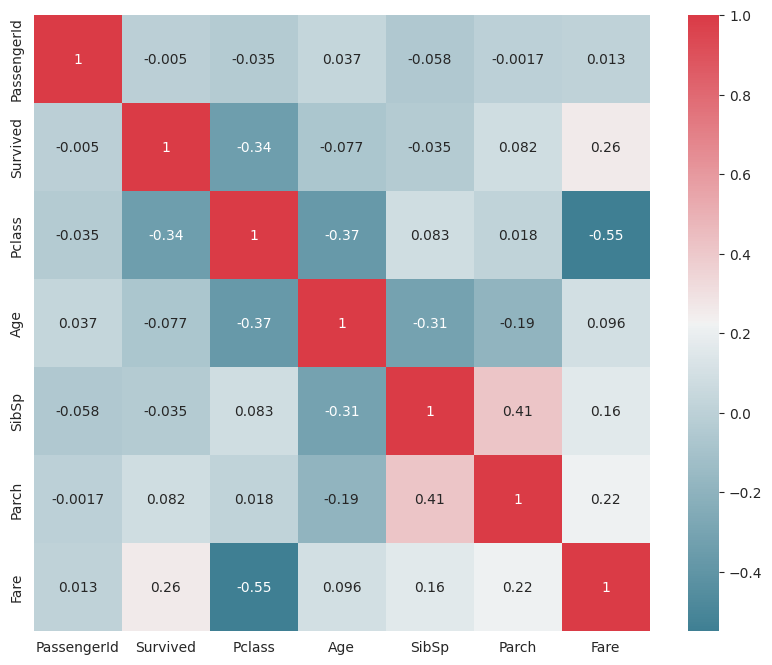

In [127]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

## Preprocessor

In [128]:
#@title The biggest correlation is SibSp with Parch, and these features dont have correlation with survived, soo i'm going to combine these two features.
def get_relatives(df):
    df['Relatives'] = df['SibSp'].values + df['Parch'].values
    return df

train_data = get_relatives(train_data)
test_data = get_relatives(test_data)
train_data.head()

relatives_corr = train_data['Survived'].corr(train_data['Relatives'])

In [129]:
#@title We can discard the data with null ages, as there is no excellent method to fill in these values ​​honestly, but i will use mean groupy per title.
#train_data = train_data.drop(train_data[train_data['Age'].isnull()].index)
#train_data.isnull().sum()

In [130]:
#@title Get the titles
def get_titles(df):
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    return df

train_data = get_titles(train_data)
test_data = get_titles(test_data)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [131]:
def mean_age_by_title(df):
    # group the df by the 'Title' column and compute the mean age for each group
    mean_age_by_title = round(df.groupby('Title')['Age'].mean())
    return mean_age_by_title

mean_ages_by_title = mean_age_by_title(train_data)
mean_ages_by_title_test = mean_age_by_title(test_data)
print(mean_ages_by_title)

Title
Capt            70.0
Col             58.0
Don             40.0
Dr              42.0
Jonkheer        38.0
Lady            48.0
Major           48.0
Master           5.0
Miss            22.0
Mlle            24.0
Mme             24.0
Mr              32.0
Mrs             36.0
Ms              28.0
Rev             43.0
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64


In [132]:
def fill_missing_ages(df, mean_ages_by_title):
    for index, row in df.iterrows():
        if pd.isnull(row['Age']):
            age_of_title = mean_ages_by_title[row['Title']] # look the title in the series and get the mean age.
            df.at[index, 'Age'] = age_of_title
    return df
fill_missing_ages(train_data, mean_ages_by_title)
fill_missing_ages(test_data, mean_ages_by_title_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,32.0,0,0,A.5. 3236,8.0500,NaN,S,0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr
416,1308,3,"Ware, Mr. Frederick",male,32.0,0,0,359309,8.0500,NaN,S,0,Mr


In [133]:
display(train_data.isnull().sum())
print()
display(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Relatives        0
Title            0
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Relatives        0
Title            0
dtype: int64

## Data Visualization

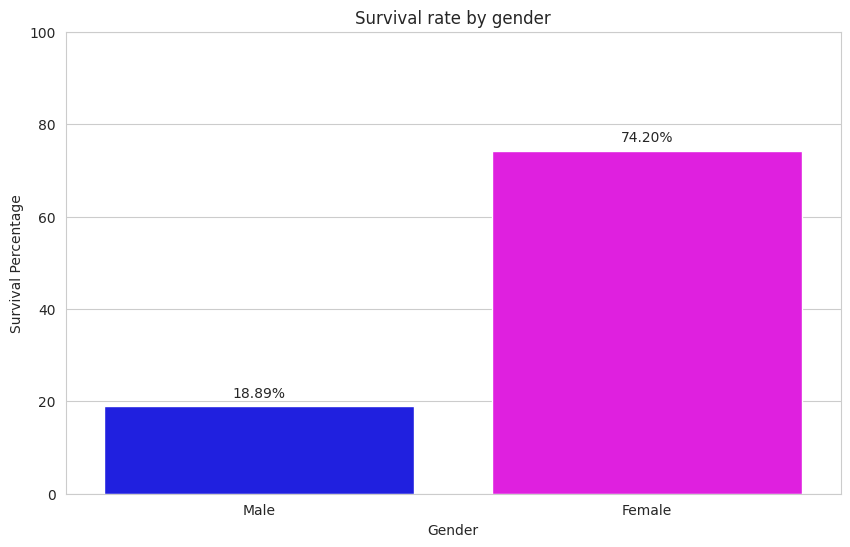

In [134]:
#@title Survival rate by gender
male_passengers = train_data[train_data['Sex'] == 'male']
survival_male = male_passengers['Survived'].sum() / male_passengers['Survived'].count()

female_passengers = train_data[train_data['Sex'] == 'female']
survival_female = female_passengers['Survived'].sum() / female_passengers['Survived'].count()

survival_male_percentage = survival_male * 100
survival_female_percentage = survival_female * 100

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.title("Survival rate by gender")
plt.xlabel('Gender')
plt.ylabel('Survival Percentage')
plt.ylim(0, 100)

sns.barplot(x=['Male', 'Female'], y=[survival_male_percentage, survival_female_percentage], hue=['Male', 'Female'], palette=['b', 'magenta'], legend=False)

for index, value in enumerate([survival_male_percentage, survival_female_percentage]):
    plt.text(index, value + 2, f'{value:.2f}%', ha='center')

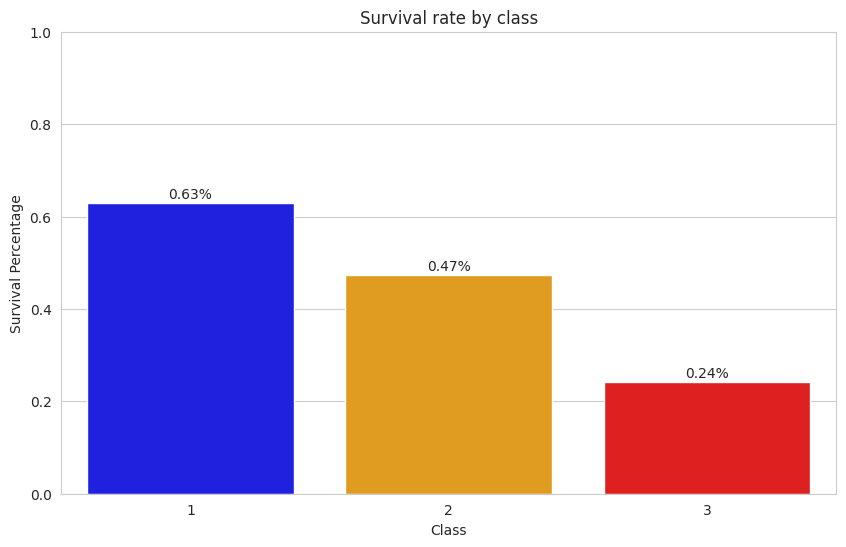

In [135]:
classes = train_data['Pclass'].unique()
classes.sort()

survival_list = []

for item in classes:
    class_passengers = train_data[train_data['Pclass'] == item]
    survival_class = class_passengers['Survived'].sum()/class_passengers['Survived'].count()
    survival_list.append(survival_class)

plt.figure(figsize=(10, 6))
plt.title("Survival rate by class")
plt.xlabel('Class')
plt.ylabel('Survival Percentage')
plt.ylim(0, 1)

sns.barplot(x=['1', '2', '3'], y= survival_list, hue=['1', '2', '3'], palette=['blue', 'orange', 'r'], legend=False)

for index, value in  enumerate(survival_list):
    plt.text(index, value + 0.01, f'{value:.2f}%', ha='center')

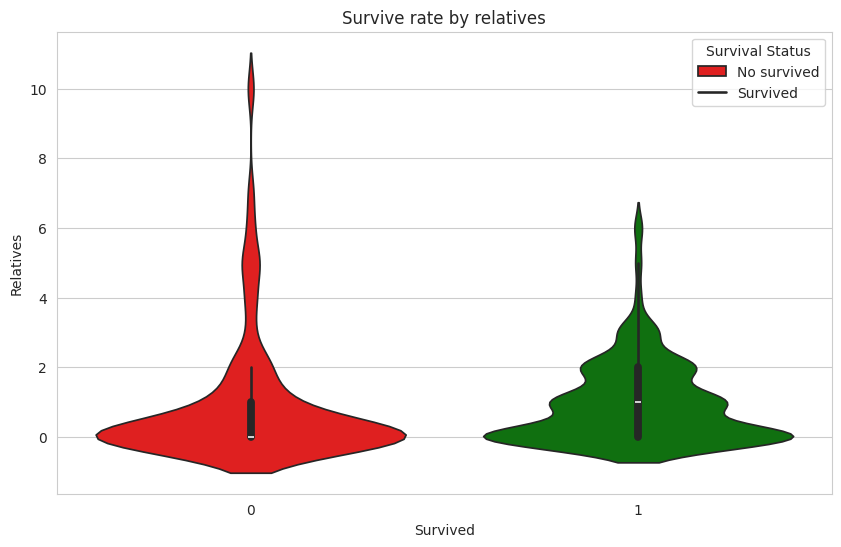

In [136]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=train_data["Survived"], y=train_data["Relatives"], hue=train_data["Survived"], palette={0: "red", 1: "green"})
plt.title('Survive rate by relatives')
plt.legend(title='Survival Status', labels=['No survived', 'Survived'])

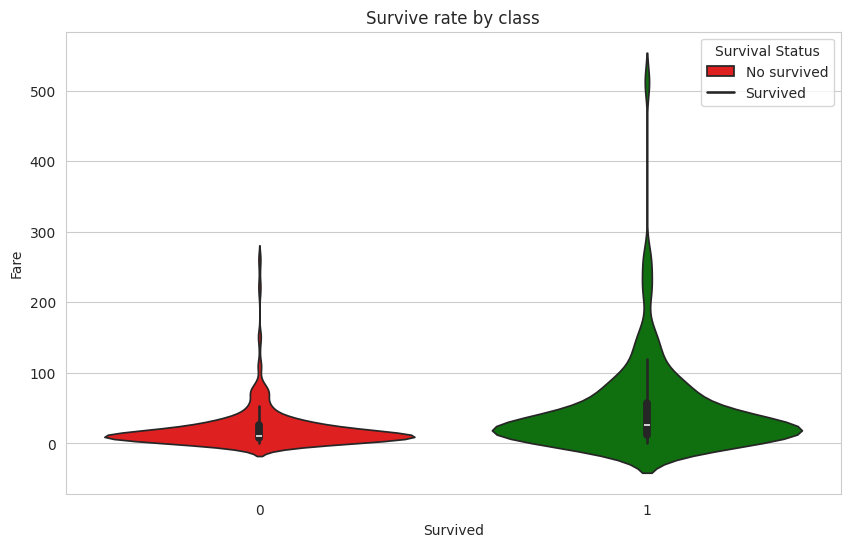

In [137]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=train_data["Survived"], y=train_data["Fare"], hue=train_data["Survived"], palette={0: "red", 1: "green"})
plt.title('Survive rate by class')
plt.legend(title='Survival Status', labels=['No survived', 'Survived'])

## Training pipeline

In [138]:
#@title Defining X and y (features and target)
numeric_columns = ['Pclass', 'Fare', 'Relatives', 'Age']
categoric_columns = ['Sex', 'Embarked']

my_columns = categoric_columns + numeric_columns

X = train_data[my_columns].copy()
y = train_data['Survived']

final_test = test_data[my_columns].copy()

`Survived` have a correlation with `Pclass`

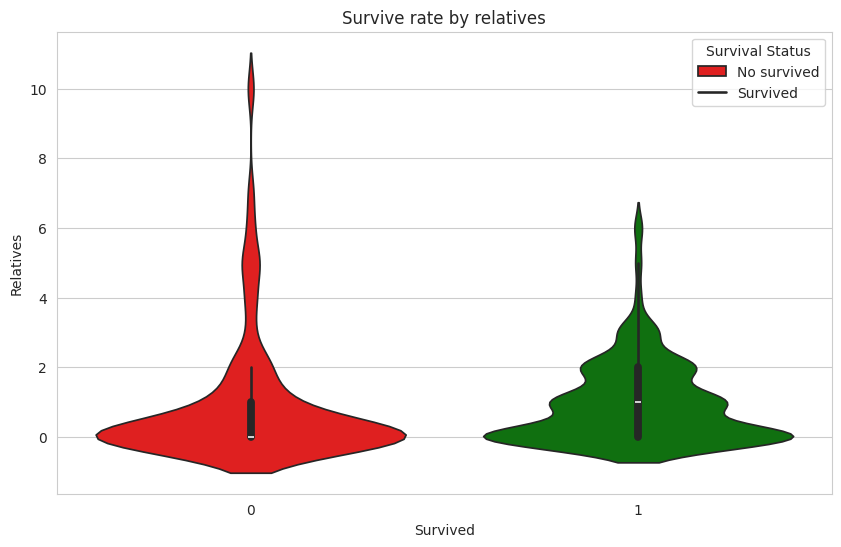

In [139]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=train_data["Survived"], y=train_data["Relatives"], hue=train_data["Survived"], palette={0: "red", 1: "green"})
plt.title('Survive rate by relatives')
plt.legend(title='Survival Status', labels=['No survived', 'Survived'])

In [140]:
#@title Preprocessor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # fills the feature with te most_frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numeric_columns),
    ('cat', categorical_transformer, categoric_columns)
])


rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth=None, max_features='sqrt', random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)

rf.fit(X_train_preprocessed, y_train)

X_test_preprocessed = preprocessor.transform(X_test)

accuracy = rf.score(X_test_preprocessed, y_test)

print("Precisão do modelo otimizado:", accuracy)


Precisão do modelo otimizado: 0.8324022346368715


In [141]:
#@title Searching for the best hyperparameter
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [25, 50, 75, 100, 125] # Lista de valores a serem testados
}

# Realizando a busca em grade (Grid Search) com validação cruzada (cross-validation)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_preprocessed, y_train)

# Obtendo o melhor valor encontrado para o hiperparâmetro n_estimators
melhor_n_estimators = grid_search.best_params_['n_estimators']
print("Melhor valor para n_estimators: ", melhor_n_estimators)

Melhor valor para n_estimators:  75


In [142]:
rf = RandomForestClassifier(n_estimators = melhor_n_estimators, criterion = 'entropy', max_depth=6, max_features='sqrt', random_state=42)

Here we need to read the tpot output and create this model

In [143]:
#@title Creating a pipeline with preprocessor and random forest model
model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf)
                              ])

In [144]:
#@title Training the model
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Pclass', 'Fare',
                                                   'Relatives', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        n_estimators=75, random_state=42))])

In [145]:
#@title Making the final predict
predictions = model.predict(final_test)

## Sending the submission

In [146]:
#@title Saving the test predictions to file
output = pd.DataFrame({'PassengerId': test_data['PassengerId'],
                       'Survived': predictions})
output.to_csv('submission.csv', index=False)

Notes and suggestions for the future

- explore the `cabins` feature more intensively.

- Check if the boarding location that only has 2 passengers is confusing the model, because both survived.